In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [8]:
battle = (plt.imread("Game Boy GBC - Pokemon Red Blue - Battle Interface.png")*255).astype(np.uint8)
intro  = (plt.imread("Game Boy GBC - Pokemon Red Blue - Intro and Title GB & SGB.png")*255).astype(np.uint8)

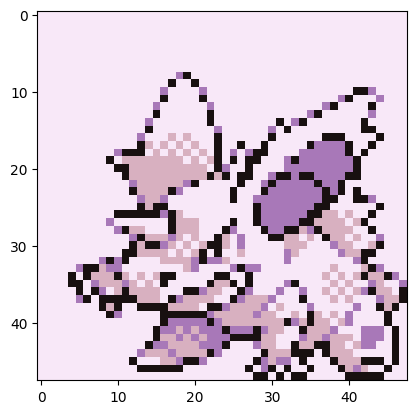

In [9]:
plt.imshow(intro[530:578, 984:984+48])

In [10]:
gengar = []
nidoran = []
for n in range(3):
    gengar.append(intro[472:472+56, 984+n*58:984+56+n*58, :3])
    nidoran.append(intro[530:530+48, 984+n*58:984+48+n*58, :3])
    gengar[n][gengar[n] == np.array([248, 232, 248])] = 255
    nidoran[n][nidoran[n] == np.array([248, 232, 248])] = 255

In [11]:
for n, image in enumerate(gengar):
    plt.imsave(f"assets/gengar{n}.png", image)
for n, image in enumerate(nidoran):
    plt.imsave(f"assets/nidoran{n}.png", image)

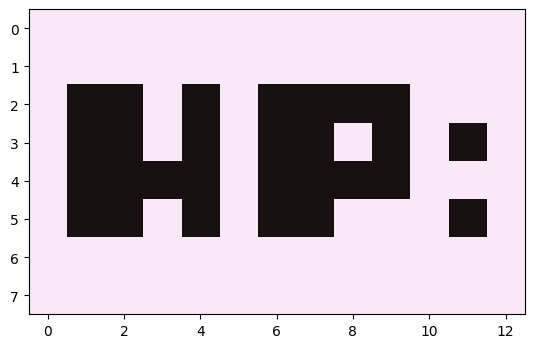

In [56]:
plt.imshow(battle[805+155:813+155, 192:205, :3])

In [72]:
text_box = battle[104:152, 8:168, :3]
text_box[text_box == 248] = 255
plt.imsave("assets/text_box.png", text_box)

arrow = battle[808:821, 187:264, :3]
arrow[arrow == np.array([248, 232, 248])] = 255
arrow[arrow == np.array([168,   0,  32])] = 255
arrow[arrow == np.array([255,  13,  19])] = 255

hp = battle[805+155:813+155, 192:205, :3] # 8x13
hp[hp == np.array([248, 232, 248])] = 255


bar = []
for n in range(3):
    bar.append(battle[792+16*n:796+16*n, 360:410, :3])
    bar[n][bar[n] == np.array([248, 232, 248])] = 255
    plt.imsave(f"assets/bar{n}.png", bar[n])


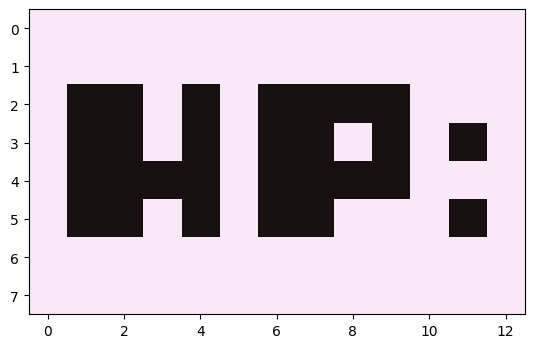

In [59]:
plt.imshow(hp)

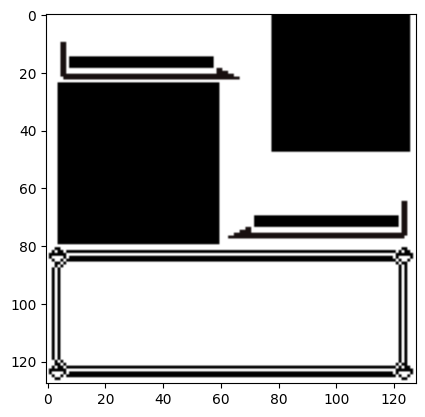

In [91]:
base = np.ones((128, 128, 3), dtype=np.uint8)*255
base[128-48:128, ::, ::] = text_box[::, :128, ::]
base[128-48:128, 100:129, ::] = text_box[::, 132:160, ::]
base[88:120, 8:120] = 255

base[10:10+13, 5:5+40] = arrow[:, :40]
base[10:10+13, 22:22+45] = arrow[:, 32:]

base[65:65+13, 85:85+40] = arrow[:, :40][:, ::-1]
base[65:65+13, 63:63+45] = arrow[:, 32:][:, ::-1]

# base[12:12+8, 8:8+13] = hp[::, :13]
# base[65:65+8, 65:65+13] = hp[::, :13]

#bar
base[15:15+4, 8:8+50] =     bar[1]  *0
base[70:70+4, 72:72+50] =   bar[2]  *0

base[24:24+56, 4:4+56] = gengar[0]  *0
base[0:0+48, 78:78+48] = nidoran[0] *0

plt.imshow(base)

In [16]:
plt.imsave("assets/base.png", base)

In [40]:
def image_to_hex(image):
    hex_data = []
    for row in image:
        hex_data.append([])
        for col in row:
            hex_data[-1].append(f"0x{col[0]:02x}{col[1]:02x}{col[2]:02x}")
    print("{")
    for n in hex_data:
        print("\t" + str(n).replace("'", "").replace("[", "{").replace("]", "}"))
    print("}")


In [25]:
f"{10:02X}"

'0A'